In [16]:
'''
Classification: Support Vector Machine
Dataset : user_behavior_dataset.csv
Implement Support Vector Machine for a dataset. 
'''

'\nClassification: Support Vector Machine\nDataset : user_behavior_dataset.csv\nImplement Support Vector Machine for a dataset. \n'

In [43]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv(r'LP-1_Dataset\SVM\user_behavior_dataset.csv')

data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [19]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [20]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [21]:
categorical_cols = ['Device Model', 'Operating System', 'Gender']

label_encoder = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoder[col] = le

In [22]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122,40,1,4
1,2,1,0,268,4.7,1331,42,944,47,0,3
2,3,3,0,154,4.0,761,32,322,42,1,2
3,4,0,0,239,4.8,1676,56,871,20,1,3
4,5,4,1,187,4.3,1367,58,988,31,0,3


In [23]:
X = data.drop(columns=['User ID', 'User Behavior Class'])
y = data['User Behavior Class']

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [38]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [39]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



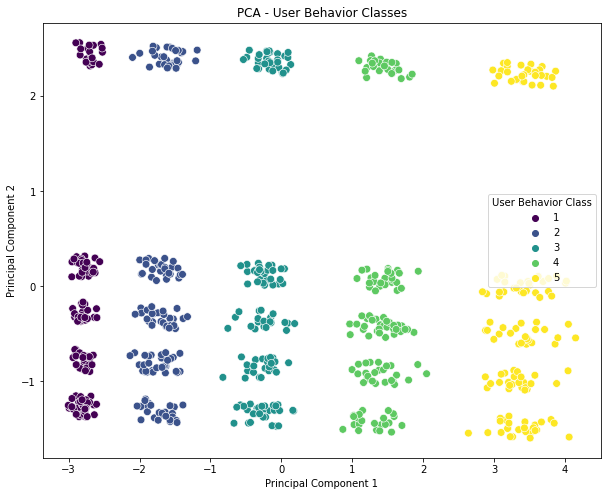

In [44]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", s=60)
plt.title("PCA - User Behavior Classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="User Behavior Class")
plt.show()